In [2]:
from nsepy import get_history
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

stock="ASIANPAINT"
start=start=date(2021,5,1)
end=date(2021,6,24)
end2=date(2021,7,29)
end3=date(2021,8,26)
data_nearmonth_fut = get_history(symbol=stock,futures=True,start=start, end=end,
expiry_date=end)
data_nextmonth_fut = get_history(symbol=stock,futures=True,start=start, end=end2,
expiry_date=end2)
data_farmonth_fut = get_history(symbol=stock,futures=True,start=start, end=end3,
expiry_date=end3)
stock_data = get_history(symbol=stock,start=start, end=end3)

In [3]:
stock_data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-07-16,ASIANPAINT,EQ,2983.60,2994.0,3006.0,2965.00,2989.90,2989.30,2983.47,1062548,3.170083e+14,54021,582920,0.5486
2021-07-19,ASIANPAINT,EQ,2989.30,2989.3,2999.7,2965.00,2980.00,2981.95,2981.64,837836,2.498125e+14,55888,383471,0.4577
2021-07-20,ASIANPAINT,EQ,2981.95,2996.0,3179.5,2979.55,3145.05,3159.05,3090.59,6755922,2.087981e+15,311385,1145884,0.1696
2021-07-22,ASIANPAINT,EQ,3159.05,3130.0,3165.0,3090.00,3101.30,3106.75,3121.84,1982572,6.189276e+14,120866,646868,0.3263
2021-07-23,ASIANPAINT,EQ,3106.75,3106.0,3129.6,3078.05,3085.15,3083.75,3097.38,815329,2.525383e+14,60645,277838,0.3408


In [4]:
OI_combined= pd.concat([data_nearmonth_fut['Open Interest'],data_nextmonth_fut['Open Interest'], data_farmonth_fut['Open Interest']],
axis=1)
OI_combined['oi_combined']=OI_combined.sum(axis=1)
OI_combined['close'] = stock_data.Close
OI_combined['price_change'] = (stock_data['Close'].pct_change()) * 100
OI_combined['oi_change'] = OI_combined['oi_combined'].diff()
OI_combined['oi_pct_change'] = (OI_combined['oi_combined'].pct_change()) * 100
OI_combined['delivery'] = stock_data['Deliverable Volume']
OI_combined['%Deliverble'] = stock_data['%Deliverble']
OI_combined['VWAP'] = stock_data['VWAP']
OI_combined['5d_del_avg'] = stock_data.iloc[:,12].rolling(window=5).mean()
OI_combined['chg_delivery'] =  OI_combined['delivery'] / OI_combined['5d_del_avg']

In [5]:
long_build_up = OI_combined[(OI_combined['price_change'] > 0) & (OI_combined['oi_change'] > 0) & (OI_combined.index != end)]

In [6]:
conditions = [
    (OI_combined['price_change'] > 0) & (OI_combined['oi_change'] > 0) & (OI_combined.index != end),
    (OI_combined['price_change'] < 0) & (OI_combined['oi_change'] > 0) & (OI_combined.index != end),
    (OI_combined['price_change'] < 0) & (OI_combined['oi_change'] < 0) & (OI_combined.index != end),
    (OI_combined['price_change'] > 0) & (OI_combined['oi_change'] < 0) & (OI_combined.index != end)
    ]

In [7]:
values = ['long_buildup', 'short_buildup', 'long_unwinding', 'short_covering']

In [8]:
OI_combined['action'] = np.select(conditions, values)

In [9]:
OI_combined

,Open Interest,Open Interest,Open Interest,oi_combined,close,price_change,oi_change,oi_pct_change,delivery,%Deliverble,VWAP,5d_del_avg,chg_delivery,action
2021-05-03,66900.0,900,NaN,67800.0,2582.15,NaN,NaN,NaN,281236,0.2718,2558.64,NaN,NaN,0
2021-05-04,113100.0,900,NaN,114000.0,2587.15,0.193637,46200.0,68.141593,403493,0.3813,2593.74,NaN,NaN,long_buildup
2021-05-05,129300.0,1500,NaN,130800.0,2567.65,-0.753725,16800.0,14.736842,496992,0.4073,2575.73,NaN,NaN,short_buildup
2021-05-06,173100.0,2700,NaN,175800.0,2549.05,-0.724398,45000.0,34.403670,791365,0.5213,2545.52,NaN,NaN,short_buildup
2021-05-07,184800.0,4500,NaN,189300.0,2551.65,0.101999,13500.0,7.679181,679323,0.4797,2562.89,530481.8,1.280577,long_buildup
2021-05-10,207000.0,4200,NaN,211200.0,2556.95,0.207709,21900.0,11.568938,775607,0.5080,2563.10,629356.0,1.232382,long_buildup
2021-05-11,240300.0,6300,NaN,246600.0,2556.25,-0.027376,35400.0,16.761364,534071,0.4571,2544.64,655471.6,0.814789,short_buildup
2021-05-12,223200.0,6000,NaN,229200.0,2556.20,-0.001956,-17400.0,-7.055961,499218,0.2394,2566.94,655916.8,0.761100,long_unwinding
2021-05-14,243000.0,10500,NaN,253500.0,2774.50,8.540020,24300.0,10.602094,1898086,0.1800,2767.41,877261.0,2.163650,long_buildup
2021-05-17,269100.0,12300,NaN,281400.0,2782.75,0.297351,27900.0,11.005917,257538,0.1207,2786.71,792904.0,0.324804,long_buildup


In [10]:
total_long_buildup = OI_combined[OI_combined['action'] == "long_buildup"]['oi_change'].sum() - OI_combined[OI_combined['action'] == "long_unwinding"]['oi_change'].sum()

In [11]:
total_long_buildup

6619500.0

In [12]:
OI_combined[OI_combined['%Deliverble'] > 0.5][['close', 'VWAP']]

,close,VWAP
2021-05-06,2549.05,2545.52
2021-05-10,2556.95,2563.10
2021-06-02,2903.70,2902.17
2021-06-03,2935.35,2921.21
2021-06-08,2926.25,2922.05
2021-06-10,2950.60,2940.62
2021-06-11,2956.25,2953.60
2021-06-18,3047.20,3043.93
2021-07-09,3010.60,3016.09
2021-07-12,2999.40,3009.20


In [13]:
total_short_buildup = OI_combined[OI_combined['action'] == "short_buildup"]['oi_change'].sum() - OI_combined[OI_combined['action'] == "short_covering"]['oi_change'].sum()

In [14]:
total_short_buildup

2098200.0

In [15]:
total_long_buildup > total_short_buildup

True

In [19]:
total_short = OI_combined.shift(periods=5)[OI_combined['action'] == "short_buildup"]['oi_change'].sum() - OI_combined.shift(periods=5)[OI_combined['action'] == "short_covering"]['oi_change'].sum()

In [20]:
total_short

1095600.0

In [21]:
OI_combined.tail()[OI_combined['action'] == "short_buildup"]['oi_change'].sum() - OI_combined.tail()[OI_combined['action'] == "short_covering"]['oi_change'].sum()

<ipython-input-21-69431f50fbef>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  OI_combined.tail()[OI_combined['action'] == "short_buildup"]['oi_change'].sum() - OI_combined.tail()[OI_combined['action'] == "short_covering"]['oi_change'].sum()


87900.0

In [94]:
total_long_buildup - total_short_buildup

4314900.0

In [ ]:

total_long_buildup = OI_combined[OI_combined['action'] == "long_buildup"]['oi_change'].sum() - OI_combined[OI_combined['action'] == "long_unwinding"]['oi_change'].sum()

In [112]:
last_14_days = OI_combined['oi_change'].rolling(window=3)
print(last_14_days['action'])

AttributeError: 'Series' object has no attribute 'columns'

In [4]:
# Creating a function to generate rollover percent
def rollover():
   ''' This function takes the futures data, expiry date
       and returns an estimate of rollover percent '''
  
   #df = data.loc[expiry_date]
  
   Near_month_oi = data_nearmonth_fut['Open Interest'].mean()
   Next_month_oi = data_nextmonth_fut['Open Interest'].mean()
   Far_month_oi = data_farmonth_fut['Open Interest'].mean()
  
   return round(100* (Next_month_oi + Far_month_oi) /  (Near_month_oi + Next_month_oi + Far_month_oi),2)

# Creating a new DataFrame with rollover % for expiry dates
expiry_dates =[end,end2,end3]

expiry_df = pd.DataFrame(index=expiry_dates , columns = ['rollover %','oi', stock])

for i in range(len(expiry_dates)):
    expiry_df['rollover %'].iloc[i] = rollover()
    expiry_df['oi'].iloc[i] = data_nextmonth_fut['Open Interest']#.loc[expiry_dates[i]]
    expiry_df[stock].iloc[i] = data_nearmonth_fut['Close']#.loc[expiry_dates[i]]
  
expiry_df.index.name='Expiry_date'
expiry_df

ValueError: No axis named 1 for object type Series

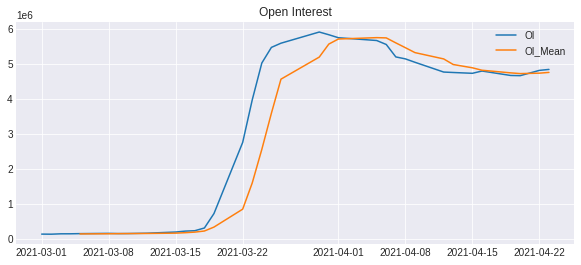

In [66]:
ax =OI_combined['Close'].plot(figsize=(15,7), color='b')
plt.ylabel('Future Price',fontsize='x-large')
plt.title(' Price vs OI \n (Note: red lines mark the expiry dates)',fontsize ='xx-large')
plt.axvline(datetime(2021, 3, 25), color='r') # Jan expiry
plt.axvline(datetime(2021, 4, 29),color='r') # Feb expiry
plt.axvline(datetime(2021, 5, 27),color='r') # March expiry

#plt.axvline(datetime(2020, 3, 13),color='black', ls=':', ymax=0.95)

OI_combined['OI_Combined'].plot(ax=ax, secondary_y=True,color='black')
plt.ylabel('OI for Stock',fontsize='x-large')
plt.legend()
plt.show()

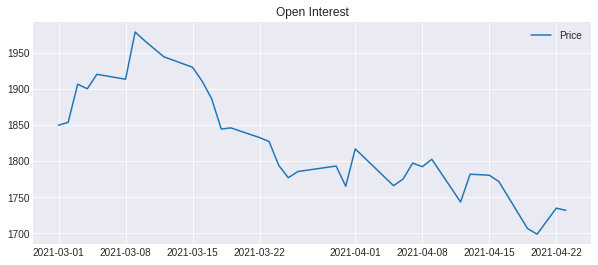

In [59]:
plt.figure(1,figsize=(10,9))
plt.subplot(211)
plt.title('Open Interest')
#plt.plot(OI_combined.OI_Combined,label='OI')
plt.plot(OI_combined.Close,label='Close')
#plt.plot(OI_combined.Close,label='Price')
plt.legend(['Price'])

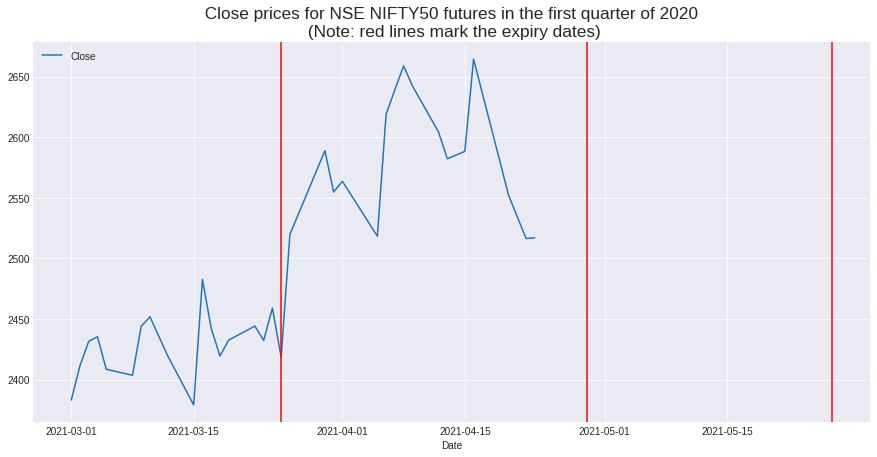

In [67]:
OI_combined['Close'].plot(figsize=(15,7))
plt.title(' Close prices for NSE NIFTY50 futures in the first quarter of 2020 \n (Note: red lines mark the expiry dates)'\
        ,fontsize ='xx-large')
plt.axvline(datetime(2021, 3, 25), color='r') # Jan expiry
plt.axvline(datetime(2021, 4, 29),color='r') # Feb expiry
plt.axvline(datetime(2021, 5, 27),color='r') # March expiry
plt.legend()
plt.show()

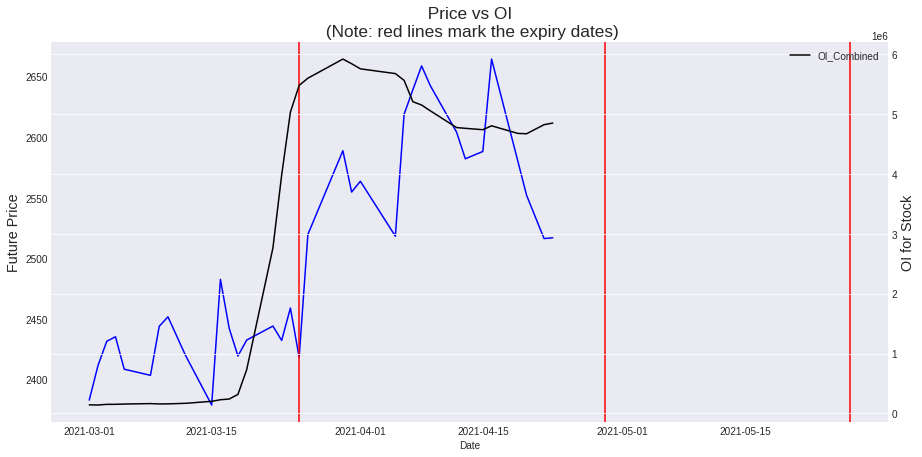

In [68]:
ax =OI_combined['Close'].plot(figsize=(15,7), color='b')
plt.ylabel('Future Price',fontsize='x-large')
plt.title(' Price vs OI \n (Note: red lines mark the expiry dates)',fontsize ='xx-large')
plt.axvline(datetime(2021, 3, 25), color='r') # Jan expiry
plt.axvline(datetime(2021, 4, 29),color='r') # Feb expiry
plt.axvline(datetime(2021, 5, 27),color='r') # March expiry

#plt.axvline(datetime(2020, 3, 13),color='black', ls=':', ymax=0.95)

OI_combined['OI_Combined'].plot(ax=ax, secondary_y=True,color='black')
plt.ylabel('OI for Stock',fontsize='x-large')
plt.legend()
plt.show()